In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
data = pd.read_csv(r'C:\Users\bovas\Desktop\Main Project\Aroma Detection\data.csv')

In [3]:
data.tail()

,voc1,no2,eth,co,tag
7322,4.62,4.7,4.45,4.50,orange
7323,4.62,4.7,4.44,4.50,orange
7324,4.62,4.7,4.44,4.49,orange
7325,4.61,4.7,4.44,4.49,orange
7326,4.61,4.7,4.44,4.47,orange


In [4]:
data

,voc1,no2,eth,co,tag
0,1.31,1.18,1.17,0.78,background
1,1.31,1.19,1.17,0.78,background
2,1.32,1.19,1.17,0.79,background
3,1.31,1.18,1.17,0.78,background
4,1.31,1.17,1.17,0.78,background
...,...,...,...,...,...
7322,4.62,4.70,4.45,4.50,orange
7323,4.62,4.70,4.44,4.50,orange
7324,4.62,4.70,4.44,4.49,orange
7325,4.61,4.70,4.44,4.49,orange


In [5]:
X, y = data[['voc1','no2','eth','co']], data['tag']

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from joblib import dump, load

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y_categorical = to_categorical(y, num_classes=3)

X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save the scaler
scaler_path = (r'C:\Users\bovas\Desktop\Main Project\Aroma Detection\scaler.pkl')
dump(scaler, scaler_path)

['C:\\Users\\bovas\\Desktop\\Main Project\\Aroma Detection\\scaler.pkl']

In [6]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    patience=5, 
    monitor='val_loss', 
    restore_best_weights=True,  
    verbose=1  
)

model = Sequential()
model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
147/147 [==============================] - 2s 5ms/step - loss: 0.3504 - accuracy: 0.9597 - val_loss: 0.0099 - val_accuracy: 1.0000
Epoch 2/50
147/147 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 3/50
147/147 [==============================] - 0s 3ms/step - loss: 6.1779e-04 - accuracy: 1.0000 - val_loss: 3.8805e-04 - val_accuracy: 1.0000
Epoch 4/50
147/147 [==============================] - 1s 5ms/step - loss: 2.7661e-04 - accuracy: 1.0000 - val_loss: 2.0074e-04 - val_accuracy: 1.0000
Epoch 5/50
147/147 [==============================] - 1s 4ms/step - loss: 1.5582e-04 - accuracy: 1.0000 - val_loss: 1.2401e-04 - val_accuracy: 1.0000
Epoch 6/50
147/147 [==============================] - 1s 4ms/step - loss: 1.0079e-04 - accuracy: 1.0000 - val_loss: 8.4069e-05 - val_accuracy: 1.0000
Epoch 7/50
147/147 [==============================] - 0s 3ms/step - loss: 7.0391e-05 - accuracy: 1.0000 - val_loss: 

In [7]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

 1/46 [..............................] - ETA: 1s - loss: 2.6822e-07 - accuracy: 1.0000

46/46 [==============================] - 0s 2ms/step - loss: 2.5606e-07 - accuracy: 1.0000
Test Loss: 0.0000, Test Accuracy: 1.0000


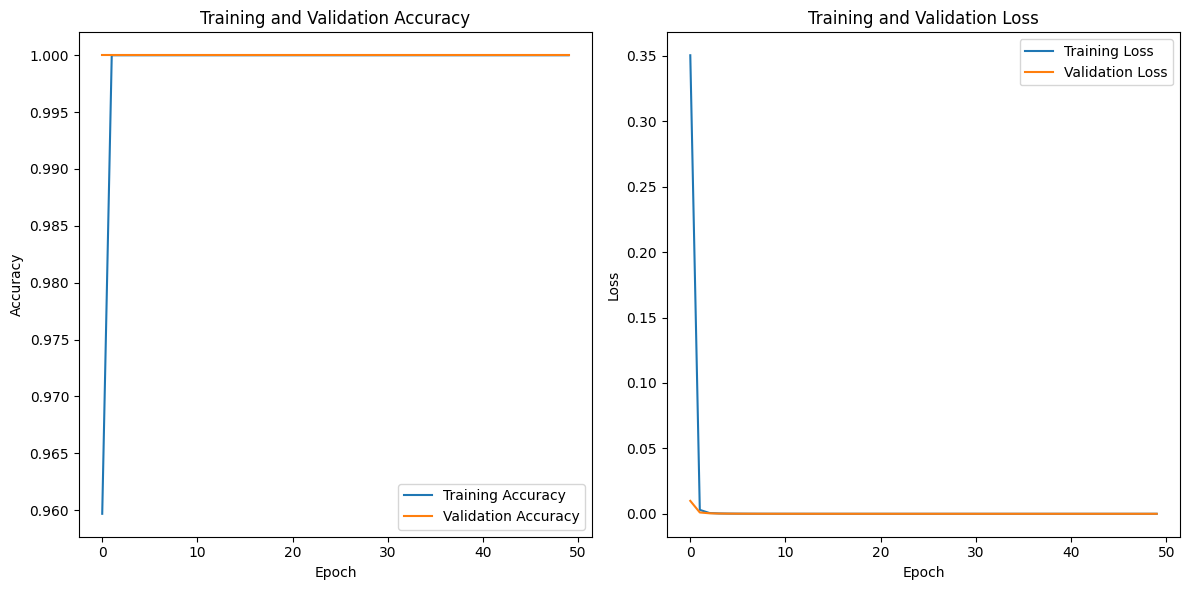

In [8]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [9]:
model.save(r"C:\Users\bovas\Desktop\Main Project\Aroma Detection\ann_model")

INFO:tensorflow:Assets written to: C:\Users\bovas\Desktop\Main Project\Aroma Detection\ann_model\assets


INFO:tensorflow:Assets written to: C:\Users\bovas\Desktop\Main Project\Aroma Detection\ann_model\assets


### Making a sample prediction

In [10]:
import numpy as np
from tensorflow.keras.models import load_model

model = load_model(r"C:\Users\bovas\Desktop\Main Project\Aroma Detection\ann_model")

inputs_features = np.array([[0.57,1.09,0.33,0.74]])

# Transform the input data using the scaler
scaled_inputs_features = scaler.transform(inputs_features)

# Predict using the model
predictions_features = model.predict(scaled_inputs_features)

# Get the predicted class index (argmax)
predicted_class_index = np.argmax(predictions_features, axis=1)

# Inverse transform the predicted class index to the original class labels
decoded_labels_features = label_encoder.inverse_transform(predicted_class_index)

print("Predicted Labels:")
print(decoded_labels_features)


1/1 [==============================] - 0s 126ms/step


c:\Users\bovas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predicted Labels:
['background']
